In [62]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import radiometry as r
from utils import band2wl, parse_time
import warnings; warnings.simplefilter('ignore')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
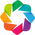

In [118]:
import holoviews as hv
hv.extension('bokeh')

In [78]:
ds = xr.open_dataset('C:/Temp/data/dark_corrected_withcoords.nc')
ds.load()

<xarray.Dataset>
Dimensions:            (band: 128, time: 23, x: 520, y: 696)
Coordinates:
  * band               (band) int32 1 2 3 4 5 6 7 ... 123 124 125 126 127 128
  * y                  (y) float64 0.5 1.5 2.5 3.5 ... 692.5 693.5 694.5 695.5
  * x                  (x) float64 0.5 1.5 2.5 3.5 ... 516.5 517.5 518.5 519.5
  * time               (time) datetime64[ns] 2018-10-03T10:59:48 ... 2018-10-03T14:00:19
Data variables:
    wavelength         (band) float64 372.5 377.5 382.5 ... 1.038e+03 1.044e+03
    material           (time) object 'White' 'PaleGrey G' ... 'Green top' 'Dark'
    dark_corrected_dn  (time, band, y, x) uint16 13 15 12 12 11 13 ... 0 0 0 0 0

In [157]:
wlds = ds.swap_dims({'time':'material'})
wlds

<xarray.Dataset>
Dimensions:            (band: 128, material: 23, x: 520, y: 696)
Coordinates:
  * band               (band) int32 1 2 3 4 5 6 7 ... 123 124 125 126 127 128
  * y                  (y) float64 0.5 1.5 2.5 3.5 ... 692.5 693.5 694.5 695.5
  * x                  (x) float64 0.5 1.5 2.5 3.5 ... 516.5 517.5 518.5 519.5
    time               (material) datetime64[ns] 2018-10-03T10:59:48 ... 2018-10-03T14:00:19
  * material           (material) object 'White' 'PaleGrey G' ... 'Dark'
Data variables:
    wavelength         (band) float64 372.5 377.5 382.5 ... 1.038e+03 1.044e+03
    dark_corrected_dn  (material, band, y, x) uint16 13 15 12 12 11 ... 0 0 0 0

In [162]:
hv_ds = hv.Dataset(ds,
                   kdims=['time', 'band', 'y', 'x'],
                   vdims=['dark_corrected_dn'])

In [165]:
imb = hv_ds.to(hv.Image, ['x', 'y'], dynamic=True).hist()
imy = hv_ds.to(hv.Image, ['x', 'band'], dynamic=True).hist()
imx = hv_ds.to(hv.Image, ['y', 'band'], dynamic=True).hist()
spectra = hv_ds.to(hv.Curve, 'band', dynamic=True)

In [167]:
%output max_frames=10000 size=100
layout = imb + imy + imx + spectra
layout.cols(2)

:Layout
   .AdjointLayout.I   :AdjointLayout
      :DynamicMap   [time,band]
         :Image   [x,y]   (dark_corrected_dn)
      :DynamicMap   [time,band]
         :Histogram   [dark_corrected_dn]   (dark_corrected_dn_frequency)
   .AdjointLayout.II  :AdjointLayout
      :DynamicMap   [time,y]
         :Image   [x,band]   (dark_corrected_dn)
      :DynamicMap   [time,y]
         :Histogram   [dark_corrected_dn]   (dark_corrected_dn_frequency)
   .AdjointLayout.III :AdjointLayout
      :DynamicMap   [time,x]
         :Image   [y,band]   (dark_corrected_dn)
      :DynamicMap   [time,x]
         :Histogram   [dark_corrected_dn]   (dark_corrected_dn_frequency)
   .DynamicMap.I      :DynamicMap   [time,y,x]
      :Curve   [band]   (dark_corrected_dn)

In [145]:
curve = hv_ds.select(material='White').to(hv.Curve, 'band', 'dark_corrected_dn', dynamic=True)

In [146]:
curve

:DynamicMap   [time,y,x]
   :Curve   [band]   (dark_corrected_dn)

In [ ]:
ds['reflectance'] = ds['dark_corrected_dn'] / ds.swap_dims({'time':'material'}).sel(material='White')['dark_corrected_dn'][0]